In [2]:
# --- Import libraries ---------------------------------------------------------
import matplotlib.pyplot as plt
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg') # vector plots
import matplotlib.ticker as mtick
from matplotlib.colors import LinearSegmentedColormap

import numpy as np
import pandas as pd
import scipy.stats as spStats

import seaborn as sns
sns.set_style("whitegrid")

# --- Colors -------------------------------------------------------------------
lightgreen = "#0ACC7B"
green = "#00A35F"
red = "#E74236"
lightred = "#EE766D"
blue = "#336199"
lightblue = "#5688C7"

df = pd.read_csv("data/fullResults.csv")

In [3]:
def confidence_interval(data, C=0.95, alpha=0.05):
    n = len(data)
    mean = np.mean(data)
    s = np.std(data, ddof=1)
    tails = 2
    q = 1 - (alpha / tails) # Quantile (the cumulative probability) 
    
    dof = n - 1 # Degrees of freedom

    # Critical t-statistic, calculated using the percent-point function (aka the
    # quantile function) of the t-distribution
    t_star = spStats.t.ppf(q, dof)
    
    # Confidence interval
    upper = mean + t_star * s / np.sqrt(n)
    lower = mean - t_star * s / np.sqrt(n)

    return lower, upper

class CustomPercentFormatter(mtick.PercentFormatter):
    def __call__(self, x, pos=None):
        s = super().__call__(x, pos)
        return s.replace('.0', '')

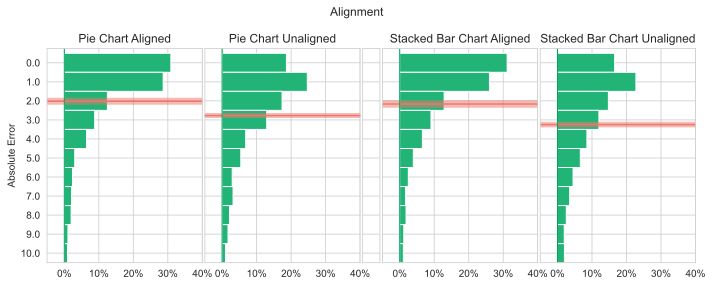

In [4]:

fig, axs = plt.subplots(1, 5, figsize=(10, 4), sharey=True, width_ratios=[9, 9, 1, 9, 9])
charts = ["pie aligned", "pie unaligned", "", "line aligned", "line unaligned"]
chartTitles = ["Pie Chart Aligned", "Pie Chart Unaligned", "", "Stacked Bar Chart Aligned", "Stacked Bar Chart Unaligned"]
variable = "absError"

df['chartTypeAlignment'] = df['chartType'] + ' ' + df['alignment']

for i in [0, 1, 3, 4]:
    chartData = df[df["chartTypeAlignment"] == charts[i]]
    sns.countplot(data = chartData,
                  y = variable,
                  ax = axs[i],
                  width = 1,
                  stat = "percent",
                  color=lightgreen)
    
    axs[i].set_ylabel(None)
    axs[i].set_ylim([10.5, -0.75])
    axs[i].grid(True)

    axs[i].set_xlim([-5, 40])
    axs[i].set_xticks(range(0, 50, 10))
    axs[i].set_xlabel("")
    axs[i].xaxis.set_major_formatter(CustomPercentFormatter())
    axs[i].set_title(chartTitles[i])

    # Calculate mean and median
    mean = chartData[variable].mean()
    median = chartData[variable].median()
    mad = spStats.median_abs_deviation(chartData[variable])
    n = len(chartData[variable])
    alpha = 0.05
    z_alpha = spStats.norm.ppf(1 - alpha)
    median_bound = median - z_alpha * (mad / np.sqrt(n))
    median_bound = median_bound

    # Plot mean and median markers
    axs[i].axhline(y=mean, color=lightred, label='Mean')
    axs[i].axvline(x=0, color=green, linewidth=1)

    lower, upper = confidence_interval(chartData[variable])
    axs[i].fill_between([-10, 100], 
                        lower, 
                        upper, 
                        color=lightred, 
                        alpha=0.5,
                        edgecolor='none')

axs[2].set_facecolor("white")
axs[2].set_xticks([], [])

axs[0].set_ylabel("Absolute Error")

plt.suptitle("Alignment")
plt.tight_layout()
plt.subplots_adjust(wspace=0.02)

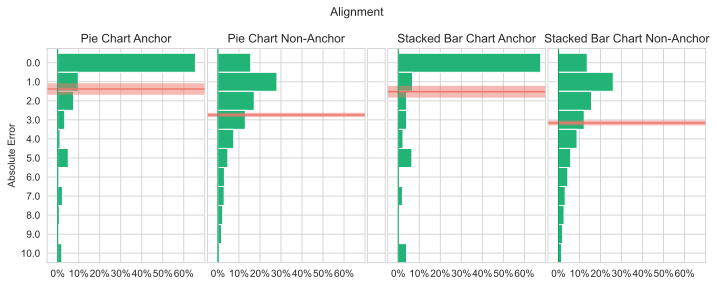

In [5]:
fig, axs = plt.subplots(1, 5, figsize=(10, 4), sharey=True, width_ratios=[9, 9, 1, 9, 9])
charts = ["pie anchor", "pie non-anchor", "", "line anchor", "line non-anchor"]
chartTitles = ["Pie Chart Anchor", "Pie Chart Non-Anchor", "", "Stacked Bar Chart Anchor", "Stacked Bar Chart Non-Anchor"]
variable = "absError"

df['chartTypeAnchor'] = df['chartType'] + ' ' + df['anchor']

for i in [0, 1, 3, 4]:
    chartData = df[df["chartTypeAnchor"] == charts[i]]
    sns.countplot(data = chartData,
                  y = variable,
                  ax = axs[i],
                  width = 1,
                  stat = "percent",
                  color=lightgreen)
    
    axs[i].set_ylabel(None)
    axs[i].set_ylim([10.5, -0.75])
    axs[i].grid(True)

    axs[i].set_xlim([-5, 70])
    axs[i].set_xticks(range(0, 70, 10))
    axs[i].set_xlabel("")
    axs[i].xaxis.set_major_formatter(CustomPercentFormatter())
    axs[i].set_title(chartTitles[i])

    # Calculate mean and median
    mean = chartData[variable].mean()
    median = chartData[variable].median()
    mad = spStats.median_abs_deviation(chartData[variable])
    n = len(chartData[variable])
    alpha = 0.05
    z_alpha = spStats.norm.ppf(1 - alpha)
    median_bound = median - z_alpha * (mad / np.sqrt(n))
    median_bound = median_bound

    # Plot mean and median markers
    axs[i].axhline(y=mean, color=lightred, label='Mean')
    axs[i].axvline(x=0, color=green, linewidth=1)

    lower, upper = confidence_interval(chartData[variable])
    axs[i].fill_between([-10, 100], 
                        lower, 
                        upper, 
                        color=lightred, 
                        alpha=0.5,
                        edgecolor='none')

axs[2].set_facecolor("white")
axs[2].set_xticks([], [])

axs[0].set_ylabel("Absolute Error")

plt.suptitle("Alignment")
plt.tight_layout()
plt.subplots_adjust(wspace=0.02)

pie 2.5665480427046266
line 2.952177016416845


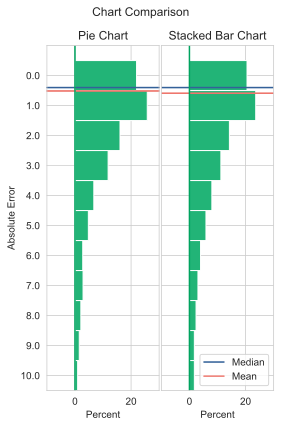

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(4, 6), sharey=True)
charts = ["pie", "line"]
chartTitles = ["Pie Chart", "Stacked Bar Chart"]
variable = "absError"

for i in range(2):
    chartData = df[df["chartType"] == charts[i]]
    sns.countplot(data = chartData,
                  y = variable,
                  ax = axs[i],
                  width = 1,
                  stat = "percent",
                  color=lightgreen)
    
    axs[i].set_ylabel(None)
    axs[i].set_ylim([10.5, -1])
    axs[i].set_xlim([-10, 30])
    # axs[i].set_xticks(range(0, 55, 25))
    axs[i].set_xlabel("Percent")
    axs[i].set_title(chartTitles[i])

    # Calculate mean and median
    mean = chartData[variable].mean()
    median = chartData[variable].median()
    mad = spStats.median_abs_deviation(chartData[variable])
    n = len(chartData[variable])
    alpha = 0.05
    z_alpha = spStats.norm.ppf(1 - alpha)
    median_bound = median - z_alpha * (mad / np.sqrt(n))
    median_bound = median_bound

    # Plot mean and median markers
    axs[i].axhline(y=median/5, color=blue, label='Median')
    axs[i].axhline(y=mean/5, color=lightred, label='Mean')
    axs[i].axvline(x=0, color=green)
    axs[i].grid(True)

    lower, upper = confidence_interval(chartData[variable])
    axs[i].fill_between([-10, 110], 
                        lower/5, 
                        upper/5, 
                        color=lightred, 
                        alpha=0.5,
                        edgecolor='none')
    # axs[i].fill_between([-10, 100], 
    #                     (median-median_bound)/5, 
    #                     (median+median_bound)/5, 
    #                     color=blue, 
    #                     alpha=0.2)

    print(charts[i], mean)
    
axs[1].legend()
axs[0].set_ylabel("Absolute Error")

plt.suptitle("Chart Comparison")
plt.tight_layout()
plt.subplots_adjust(wspace=0.02)

Text(0.5, 0.98, 'Response Time')

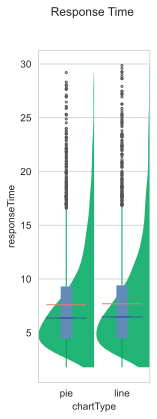

In [7]:
plt.figure(figsize=(2, 6))
variable = "responseTime"

meanKWS = {"marker":"_", "markeredgecolor":lightred, "markersize":"40"}
medianKWS = {"marker":"_", "color":blue, "markersize":"30"}
order = ["pie", "line"]

sns.violinplot(data = df,
               orient='v', 
                y = variable, 
                x = "chartType", 
                color = lightgreen, 
                cut = 0, 
                linewidth = 0,
                width = 1,
                split=True,
                order = order)

sns.boxplot(data = df, 
            orient='v',
            y = variable, 
            x = "chartType", 
            color = lightblue,
            width = 0.2, 
            showcaps = False,
            fliersize = 2, 
            showmeans = True,
            meanprops = meanKWS,
            medianprops = medianKWS,
            boxprops={'linewidth': 0, 'zorder': 2},
            whiskerprops={'linewidth': 1, "color":green},
            order = order)
plt.suptitle("Response Time")

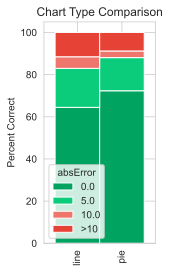

In [8]:
maxValue = 10
maxValStr = '>' + str(maxValue)

charts = ["pie", "line"]
chartTitles = ["Pie Chart", "Stacked Bar Chart"]

cmapColors = [green, lightgreen, lightred, red]
cmap = LinearSegmentedColormap.from_list(name="cmap", colors=cmapColors, N=256)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(2, 4), sharex=True, sharey=True)

df_freq = df.groupby(['chartType', 'absError']).size().unstack()
df_freq[maxValStr] = df_freq[df_freq.columns[df_freq.columns > maxValue]].sum(axis=1)
df_freq = df_freq[list(range(0, maxValue + 5, 5)) + [maxValStr]]
df_percentage = df_freq.div(df_freq.sum(axis=1), axis=0) * 100

df_percentage.plot(kind='bar', stacked=True, colormap=cmap, width=1, ax=ax)
ax.set_ylabel("Percent Correct")
ax.set_xlabel(None)
ax.set_title("Chart Type Comparison")

plt.suptitle('');

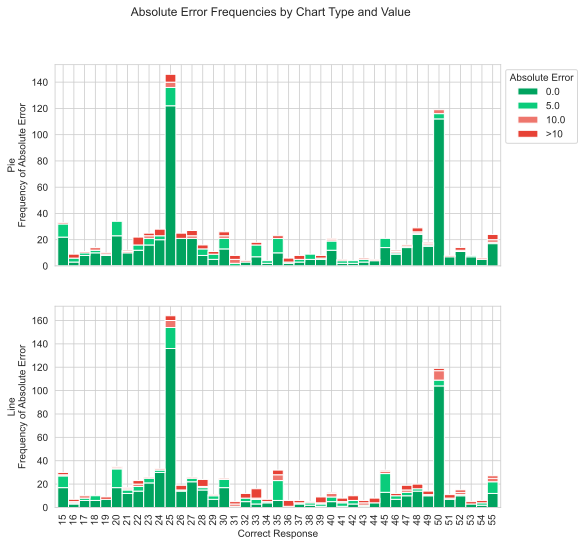

In [9]:
maxValue = 10
maxValStr = '>' + str(maxValue)

cmapColors = [green, lightgreen, lightred, red]
cmap = LinearSegmentedColormap.from_list(name="cmap", colors=cmapColors, N=256)

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 8), sharex = True)

for i, chart in enumerate(charts):
    df_freq = df[df["chartType"] == chart].groupby(['selectedPart', 'absError']).size().unstack()
    df_freq[maxValStr] = df_freq[df_freq.columns[df_freq.columns > maxValue]].sum(axis=1)
    df_freq = df_freq[list(range(0, maxValue + 5, 5)) + [maxValStr]]

    df_freq.plot(kind='bar', stacked=True, colormap=cmap, width=1, ax=axes[i])
    axes[i].set_ylabel(chart.title() + '\nFrequency of Absolute Error')
    if i != 0:
        axes[i].get_legend().remove()

axes[0].legend(loc='upper left', bbox_to_anchor=(1, 1), title="Absolute Error")
plt.xlabel('Correct Response')
plt.suptitle('Absolute Error Frequencies by Chart Type and Value');

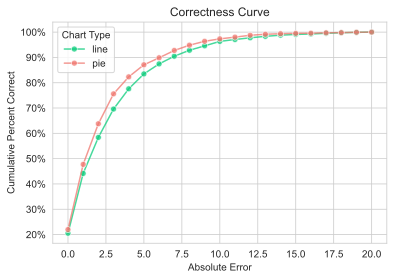

In [10]:
fig = plt.figure(figsize=(6, 4))
var = "chartType"

countsDF = df.groupby(['absError', var]).size().groupby(level=1).cumsum().reset_index(name='cumulative_count')
totalCounts = countsDF.groupby(var)['cumulative_count'].max()
countsDF['cumulative_percent'] = countsDF.apply(lambda row: (row['cumulative_count'] / totalCounts[row[var]]) * 100, axis=1)

sns.lineplot(data = countsDF,
              x = "absError",
              y = "cumulative_percent",
              hue = var,
              marker = 'o',
              alpha = 0.75,
              palette=[lightgreen, lightred])

plt.title("Correctness Curve")
plt.xlabel("Absolute Error")
plt.ylabel("Cumulative Percent Correct")
plt.legend(title="Chart Type")
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter());

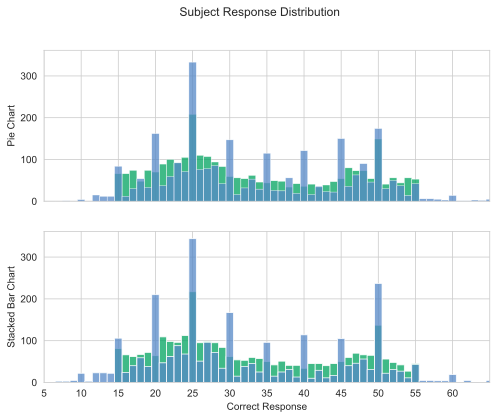

In [11]:
# Histogram settings
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(8, 6), sharex=True, sharey=True)
responseBins = np.arange(-0.5, 100.5, 1)

# Histogram overlays of the correct and subject responses
sns.histplot(data=df[df["chartType"] == "pie"],
             x="selectedPart",
             color=green,
             bins=responseBins,
             ax=axs[0])
sns.histplot(data=df[df["chartType"] == "pie"],
             x="response",
             color=lightblue,
             bins=responseBins,
             ax=axs[0])
ax.legend(["Correct Response", "Subject Response"])
axs[0].set_ylabel("Pie Chart")
axs[0].set_xlabel("Correct Response")

# Customize tick marks
axs[0].set_xticks(range(5, 65, 5))  # Mark every bin instead of every twenty
axs[0].set_xticklabels(range(5, 65, 5))  # Rotate labels for better visibility
axs[0].set_xlim([5, 65])

# Histogram overlays of the correct and subject responses
sns.histplot(data=df[df["chartType"] == "line"],
             x="selectedPart",
             color=green,
             bins=responseBins,
             ax=axs[1])
sns.histplot(data=df[df["chartType"] == "line"],
             x="response",
             color=lightblue,
             bins=responseBins,
             ax=axs[1])
axs[1].set_ylabel("Stacked Bar Chart")
axs[1].set_xlabel("Correct Response")

# Customize tick marks
axs[1].set_xticks(range(5, 65, 5))  # Mark every bin instead of every twenty
axs[1].set_xticklabels(range(5, 65, 5))  # Rotate labels for better visibility
axs[1].set_xlim([5, 65])
fig.suptitle("Subject Response Distribution");

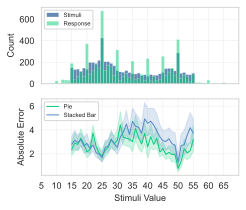

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define legend position and font size
legPos = 0.75
legFontSize = 6

# Create a 2x1 subplot layout (two rows, one column)
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(3.5, 3), sharex=True, sharey=False)

# Set bins for the histograms
responseBins = np.arange(-0.5, 100.5, 1)

# Plot the histograms in the first subplot (axs[0])
sns.histplot(data=df,
             x="selectedPart",
             color=blue,
             bins=responseBins,
             ax=axs[0],
             alpha=0.75)
sns.histplot(data=df,
             x="response",
             color=lightgreen,
             bins=responseBins,
             ax=axs[0],
             alpha=0.5)

# Add legend and labels to the first subplot
axs[0].legend(["Stimuli", "Response"], loc='upper left', fontsize=legFontSize) 
axs[0].set_xlabel("Stimuli")
axs[0].set_ylabel("Count")
axs[0].set_xticks(range(5, 70, 5))  # Mark every 5th bin
axs[0].set_xticklabels(range(5, 70, 5))  # Rotate labels for better visibility
axs[0].set_xlim([5, 70])

# Customize gridlines: thinner and lighter grey
axs[0].grid(True, linewidth=0.5, color='#ebebebff')

# Plot the line plots in the second subplot (axs[1])
sns.lineplot(data=df[(df["chartType"] == "pie")], 
             x="selectedPart", 
             y="absError",
             label="Pie",
             color=lightgreen,
             ax=axs[1],
             lw=1)
sns.lineplot(data=df[(df["chartType"] == "line")],
             x="selectedPart", 
             y="absError",
             label="Stacked Bar",
             color=lightblue,
             ax=axs[1],
             lw=1)

# Add legend and labels to the second subplot
axs[1].set_ylabel("Absolute Error")
axs[1].set_xlabel("Stimuli Value")
axs[1].legend(loc='upper left', fontsize=legFontSize)

# Customize gridlines: thinner and lighter grey
axs[1].grid(True, linewidth=0.5, color='#ebebebff')

# Adjust layout to prevent overlap of titles and labels
plt.tight_layout()

# Save the combined plot to an SVG file
plt.savefig("stimuliResults.svg", dpi=500, bbox_inches='tight')

<Figure size 1000x600 with 0 Axes>

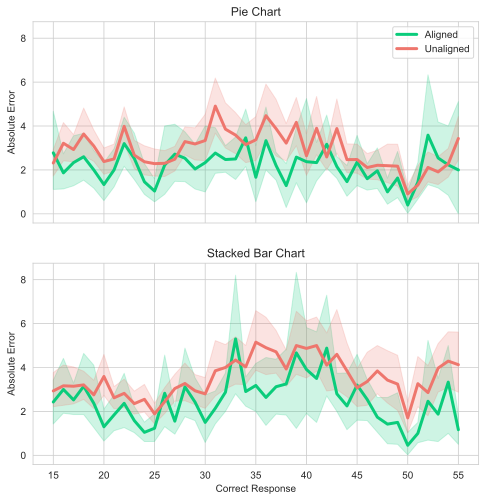

In [13]:
plt.figure(figsize=(10, 6))
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(8, 8), sharex=True, sharey=True)

sns.lineplot(data=df[(df["alignment"] == "aligned") & (df["chartType"] == "pie")], 
             x="selectedPart", 
             y="absError",
            #  errorbar=None,
             label="Aligned",
             color=lightgreen,
             ax=axs[0],
             lw=3)
sns.lineplot(data=df[(df["alignment"] == "unaligned") & (df["chartType"] == "pie")],
             x="selectedPart", 
             y="absError",
            #  errorbar=None,
             label="Unaligned",
             color=lightred,
             ax=axs[0],
             lw=3)

axs[0].set_title("Pie Chart")
axs[0].set_ylabel("Absolute Error")

sns.lineplot(data=df[(df["alignment"] == "aligned") & (df["chartType"] == "line")],
             x="selectedPart", 
             y="absError",
            #  errorbar=None,
             label="Aligned",
             color=lightgreen,
             ax=axs[1],
             lw=3)
sns.lineplot(data=df[(df["alignment"] == "unaligned") & (df["chartType"] == "line")],
             x="selectedPart", 
             y="absError",
            #  errorbar=None,
             label="Unaligned",
             color=lightred,
             ax=axs[1],
             lw=3)

axs[1].set_title("Stacked Bar Chart")
axs[1].set_ylabel("Absolute Error")
axs[1].set_xlabel("Correct Response")
axs[1].legend().remove()

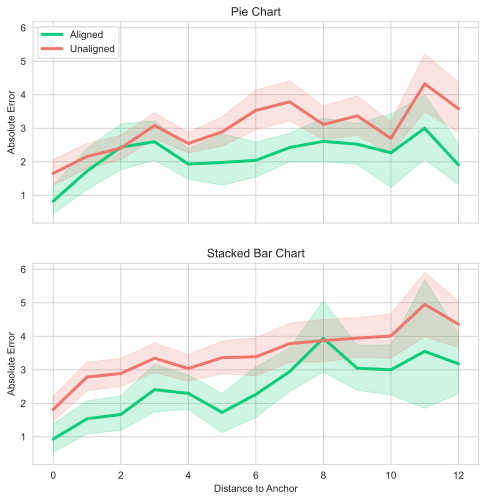

In [14]:
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(8, 8), sharex=True, sharey=True)

sns.lineplot(data=df[(df["alignment"] == "aligned") & (df["chartType"] == "pie")], 
             x="anchorDistance", 
             y="absError",
             label="Aligned",
             ax=axs[0],
             color=lightgreen, 
             lw=3)
sns.lineplot(data=df[(df["alignment"] == "unaligned") & (df["chartType"] == "pie")], 
             x="anchorDistance", 
             y="absError",
             label="Unaligned",
             ax=axs[0],
             color=lightred, 
             lw=3)

axs[0].set_title("Pie Chart")
axs[0].set_ylabel("Absolute Error")

sns.lineplot(data=df[(df["alignment"] == "aligned") & (df["chartType"] == "line")], 
             x="anchorDistance", 
             y="absError",
             label="Aligned",
             ax=axs[1],
             color=lightgreen, 
             lw=3)
sns.lineplot(data=df[(df["alignment"] == "unaligned") & (df["chartType"] == "line")], 
             x="anchorDistance", 
             y="absError",
             label="Unaligned",
             ax=axs[1],
             color=lightred, 
             lw=3)

axs[1].set_title("Stacked Bar Chart")
axs[1].set_ylabel("Absolute Error")
axs[1].set_xlabel("Distance to Anchor")
axs[1].legend().remove()

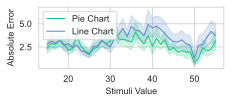

In [34]:
plt.rcParams.update({'font.size': 9})  # Updates the font size globally
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(3.33, 1.11), sharex=True, sharey=True)

sns.lineplot(data=df[(df["chartType"] == "pie")], 
             x="selectedPart", 
             y="absError",
             label="Pie Chart",
             color=lightgreen,
             ax=ax,
             lw=1)
sns.lineplot(data=df[(df["chartType"] == "line")],
             x="selectedPart", 
             y="absError",
             label="Line Chart",
             color=lightblue,
             ax=ax,
             lw=1)

ax.set_ylabel("Absolute Error")
ax.set_xlabel("Stimuli Value")

plt.savefig("stimuli.svg", dpi=300, bbox_inches='tight')

Text(0.5, 0, 'Distance To Anchor')

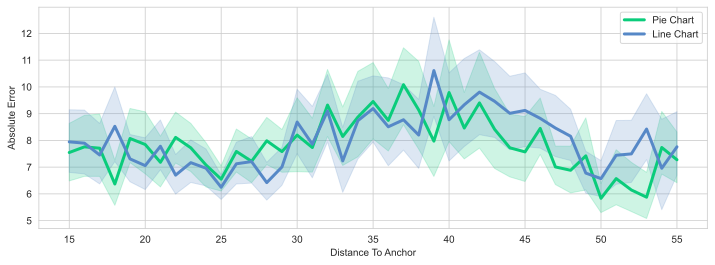

In [28]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 4), sharex=True, sharey=True)

sns.lineplot(data=df[(df["chartType"] == "pie")], 
             x="selectedPart", 
             y="responseTime",
             label="Pie Chart",
             color=lightgreen,
             ax=ax,
             lw=3)
sns.lineplot(data=df[(df["chartType"] == "line")],
             x="selectedPart", 
             y="responseTime",
             label="Line Chart",
             color=lightblue,
             ax=ax,
             lw=3)

ax.set_ylabel("Absolute Error")
ax.set_xlabel("Distance To Anchor")